<a href="https://colab.research.google.com/github/SalmanRafiullah/eai6010-capstone/blob/master/EAI6010Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

## Import data

In [0]:
#Import necessary libraries
from google.colab import drive, files
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Mount google drive
drive.mount('/content/drive')
dir = '/content/drive/My Drive/NEU/EAI6010/EAI6010Data.xlsx'
#Load data as DataFrame
MyData = pd.read_excel(dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Create derived variables

In [0]:
#Check shape of original data
MyData.shape

(703, 18)

In [0]:
#Create Public Transport variable that sums bus stops and subway stops
MyData['PublicTransport'] = MyData['PublicTransport_BusStops'] + MyData['PublicTransport_OtherStops']
#Create a weighter Public Transport variable that sums the stops proportionately 34.9:65.1
MyData['PublicTransport_W'] = MyData['PublicTransport_BusStops'] * .349 + MyData['PublicTransport_OtherStops'] * .651
#Calculate absolute numbers of TWU workers
MyData['TWU_Workers'] = np.round(MyData['Transportation, Warehousing, Utilities Workers Percentage'] * MyData['Population'])
#Calculate absolute numbers of Retail workers
MyData['R_Workers'] = np.round(MyData['Retail Trade Workers Percentage'] * MyData['Population'])
#Calculate absolute numbers of people in units with 10 or more houses
MyData['Dense_House'] = np.round(MyData['10 or More Units House Percentage'] * MyData['Population'])
#Calculate absolute numbers of population under poverty
MyData['Pop_Poverty'] = np.round(MyData['Population in Poverty Percentage'] * MyData['Population'])

In [0]:
#Check shape of data after adding variables
MyData.shape

(703, 24)

## Filter Data

In [0]:
#Filter data to exclude areas where the population is 0 and there is no public transport
MyData = MyData[(pd.notnull(MyData['PublicTransport'])) & (MyData['Population Density'] > 0)]

In [0]:
#Check number of rows deleted
MyData.shape

(536, 24)

In [0]:
#View data to check integrity
MyData

,ZipCode,City,OldCity,County,PublicTransport_BusStops,PublicTransport_OtherStops,CommunityPlaces,BikeUsage,HealthIndex,Population,Population Density,"Transportation, Warehousing, Utilities Workers Percentage",Retail Trade Workers Percentage,Population in Poverty Percentage,10 or More Units House Percentage,StateParks,CovidCount,CovidRate,PublicTransport,PublicTransport_W,TWU_Workers,R_Workers,Dense_House,Pop_Poverty
0,1001,Agawam,Agawam,Hampden,0.0,0.0,7,0.0,14,17141,1393.2,0.063,0.147,0.084,0.144,0.0,333,1164.20,0.0,0.0,1080.0,2520.0,2468.0,1440.0
1,1002,Amherst,Amherst,Hampshire,0.0,0.0,10,0.0,5,29844,526.4,0.015,0.093,0.320,0.233,1.0,60,148.16,0.0,0.0,448.0,2775.0,6954.0,9550.0
2,1003,Amherst,Amherst,Hampshire,0.0,0.0,1,0.0,5,11062,15443.6,0.000,0.108,0.013,0.250,0.0,60,148.16,0.0,0.0,0.0,1195.0,2766.0,144.0
4,1005,Barre,Barre,Worcester,0.0,0.0,5,0.0,10,5113,114.9,0.009,0.110,0.045,0.044,0.0,42,755.70,0.0,0.0,46.0,562.0,225.0,230.0
5,1007,Belchertown,Belchertown,Hampshire,0.0,0.0,6,0.0,5,14774,267.0,0.049,0.122,0.078,0.058,1.0,69,433.34,0.0,0.0,724.0,1802.0,857.0,1152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2777,Swansea,Swansea,Bristol,0.0,0.0,4,0.0,13,15997,633.1,0.052,0.140,0.052,0.009,0.0,73,457.12,0.0,0.0,832.0,2240.0,144.0,832.0
696,2779,Berkley,Berkley,Bristol,0.0,0.0,6,0.0,13,6492,372.5,0.059,0.122,0.059,0.006,1.0,41,604.70,0.0,0.0,383.0,792.0,39.0,383.0
697,2780,Taunton,Taunton,Bristol,0.0,0.0,2,0.0,13,49456,1437.0,0.054,0.160,0.142,0.114,1.0,690,1204.60,0.0,0.0,2671.0,7913.0,5638.0,7023.0
699,2790,Westport,Westport,Bristol,0.0,0.0,0,0.0,13,16142,252.8,0.046,0.133,0.033,0.016,0.0,54,324.44,0.0,0.0,743.0,2147.0,258.0,533.0


## Create a categorical variable for the dependent variable

In [0]:
#Define bins for categorization in equal bins
bins1 = np.percentile(MyData['CovidRate'],q=[0,33,66,100])
#Define labels for bins
labels1 = [1,2,3]
#Create variable that stores the categories
MyData['CovidRateCat'] = pd.cut(MyData['CovidRate'],bins=bins1,labels=labels1,include_lowest=True)

# Feature Selection

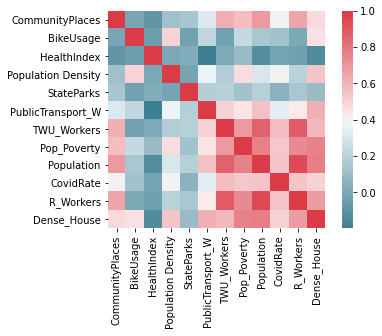

In [0]:
#Calculate correlation between all features
corr = MyData[['CommunityPlaces','BikeUsage','HealthIndex','Population Density','StateParks','PublicTransport_W','TWU_Workers','Pop_Poverty','Population','CovidRate','R_Workers','Dense_House']].corr()
#Plot the correlation as a matrix
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

# Model Selection

## Linear models for regression

In [0]:
#Create final data set by selecting appropriate features for X and Y
FinalData = MyData[['CommunityPlaces','BikeUsage','HealthIndex','Population Density','StateParks','PublicTransport_W','TWU_Workers','Pop_Poverty']]
Y = MyData['CovidRate']

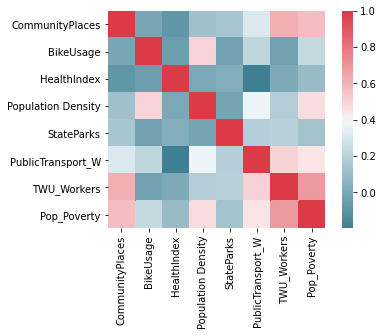

In [0]:
#Calculate correlation amongst selected features
corr = FinalData.corr()
#Plot the correlation as heatmap
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [0]:
#Split the dataset with a training size of 85%
X_train, X_test, Y_train, Y_test = train_test_split(FinalData, Y, train_size=0.85, shuffle=True, random_state=42)

### Linear Regression

In [0]:
#Fit linear regression model on train and test data
lr = LinearRegression(normalize=True).fit(X_train,Y_train)

In [0]:
#Print prediction scores on train and test data
print(f'Train score: {lr.score(X_train,Y_train)}, Test score: {lr.score(X_test,Y_test)}')

Train score: 0.4452773355822149, Test score: 0.3506333306269592


### Lasso Regression

In [0]:
#Fit lasso regression model on train and test data
lasso1 = Lasso(normalize=True).fit(X_train,Y_train)

In [0]:
#Print prediction scores on train and test data
print(f'Train score: {lasso1.score(X_train,Y_train)}, Test score: {lasso1.score(X_test,Y_test)}')

Train score: 0.43716711751112625, Test score: 0.360185407920271


### Random Forrest Regression

In [0]:
#Fit random forrest regression model on train and test data
regr = RandomForestRegressor(max_depth=2, random_state=0,criterion='mae').fit(X_train,Y_train)

In [0]:
#Print prediction scores on train and test data
print(f'Train score: {regr.score(X_train,Y_train)}, Test score: {regr.score(X_test,Y_test)}')

Train score: 0.43745612390452215, Test score: 0.4860077372094595


### AdaBoost Regression

In [0]:
#Fit adaboost regression model on train and test data
ada = AdaBoostRegressor(random_state=42, learning_rate = 0.1, loss = 'exponential', n_estimators=100)
ada.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='exponential',
                  n_estimators=100, random_state=42)

In [0]:
#Print prediction scores on train and test data
print(f'Train score: {ada.score(X_train,Y_train)}, Test score: {ada.score(X_test,Y_test)}')

Train score: 0.6515056279908936, Test score: 0.47686796323664127


## Linear models for classification

In [0]:
#Create final data set by selecting appropriate features for X and Y
FinalData1 = MyData[['CommunityPlaces','BikeUsage','HealthIndex','Population Density','StateParks','PublicTransport_W','TWU_Workers','Pop_Poverty']]
Y1 = MyData['CovidRateCat']

In [0]:
#Split the dataset with a training size of 85%
X_train, X_test, Y_train, Y_test = train_test_split(FinalData1, Y1, train_size=0.85, shuffle=True, random_state=42)

### Logistic Regression

In [0]:
#Fit logistic regression model on train and test data
CLR = LogisticRegression().fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
#Print prediction scores on train and test data
print(f'Train score: {CLR.score(X_train,Y_train)}, Test score: {CLR.score(X_test,Y_test)}')

Train score: 0.6043956043956044, Test score: 0.49382716049382713


### LinearSVC Regression

In [0]:
#Fit linearSVC classifier model on train and test data
CLS = LinearSVC().fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#Print prediction scores on train and test data
print(f'Train score: {CLS.score(X_train,Y_train)}, Test score: {CLS.score(X_test,Y_test)}')

Train score: 0.3274725274725275, Test score: 0.4074074074074074


### MLP Classifier

In [0]:
#Fit MLP classifier model on train and test data
mlp = MLPClassifier(solver='lbfgs', random_state=42, hidden_layer_sizes=[100,100], activation='logistic',learning_rate='adaptive',max_iter=500,alpha=0.00001 ).fit(X_train,Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [0]:
#Print prediction scores on train and test data
print(f'Train score: {mlp.score(X_train,Y_train)}, Test score: {mlp.score(X_test,Y_test)}')

Train score: 0.6153846153846154, Test score: 0.49382716049382713


### AdaBoost Classifier

In [0]:
#Fit ADABoost classifier model on train and test data
CAda = AdaBoostClassifier(n_estimators=500, random_state=42, learning_rate=0.1)
CAda.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=500, random_state=42)

In [0]:
#Print prediction scores on train and test data
print(f'Train score: {CAda.score(X_train,Y_train)}, Test score: {CAda.score(X_test,Y_test)}')

Train score: 0.6967032967032967, Test score: 0.6172839506172839


## City Level Model

In [0]:
#Sum and group the data by Cities
MyData1 = MyData.groupby(["City"]).sum()
#Create final data set by selecting appropriate features for X and Y
FinalData2 = MyData1[['CommunityPlaces','BikeUsage','HealthIndex','Population Density','StateParks','PublicTransport_W','TWU_Workers','Pop_Poverty']]
Y2 = MyData1['CovidRate']
#Split the dataset with a training size of 85%
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(FinalData2, Y2, train_size=0.85)

### Linear Regression

In [0]:
#Fit linear regression model on train and test data
linear_regression = LinearRegression()
CLR = linear_regression.fit(X_train2, Y_train2)
#Print prediction scores on train and test data
CLR.score(X_train2,Y_train2),CLR.score(X_test2,Y_test2)

(0.9387303846678534, 0.724262501930499)

### Random Forest Regression

In [0]:
#Fit random forest regression model on train and test data
random_forests = RandomForestRegressor()
CRF = random_forests.fit(X_train2, Y_train2)
#Print prediction scores on train and test data
CRF.score(X_train2,Y_train2),CRF.score(X_test2,Y_test2)


(0.9319090616834022, 0.7601632807991617)

### AdaBoost Regression

In [0]:
#Fit AdaBoost regression model on train and test data
ada = AdaBoostRegressor()
CADA = ada.fit(X_train2, Y_train2)
#Print prediction scores on train and test data
CADA.score(X_train2,Y_train2),CADA.score(X_test2,Y_test2)

(0.9357654824297695, 0.6712342857887723)

In [0]:
preds = ada.predict(X_test2)
r2_score(Y_test2, preds)

0.6712342857887723

### AdaBoost Classification

In [0]:
#Define bins for categorization in equal bins
bins2 = np.percentile(MyData1['CovidRate'],q=[0,33,66,100])
#Define labels for bins
labels2 = [1,2,3]
#Create variable that stores the categories
MyData1['CovidRateCat'] = pd.cut(MyData1['CovidRate'],bins=bins2,labels=labels2,include_lowest=True)

In [0]:
#Create final data set by selecting appropriate features for X and Y
FinalData2 = MyData1[['CommunityPlaces','BikeUsage','HealthIndex','Population Density','StateParks','PublicTransport_W','TWU_Workers','Pop_Poverty']]
Y2 = MyData1['CovidRateCat']
#Split the dataset with a training size of 85%
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(FinalData2, Y2, train_size=0.85)

In [0]:
#Fit AdaBoost regression model on train and test data
CADA1 = AdaBoostClassifier(n_estimators=500, random_state=42, learning_rate=0.1)
CADA1.fit(X_train3,Y_train3)
#Print prediction scores on train and test data
CADA1.score(X_train3,Y_train3),CADA1.score(X_test3,Y_test3)

(0.7774566473988439, 0.5645161290322581)